In [0]:
import pandas as pd

In [4]:
pip install lightkurve

     |████████████████████████████████| 481kB 6.4MB/s 
     |████████████████████████████████| 4.2MB 36.0MB/s 
     |████████████████████████████████| 235kB 36.5MB/s 
     |████████████████████████████████| 2.3MB 24.7MB/s 
     |████████████████████████████████| 61kB 21.6MB/s 
     |████████████████████████████████| 102kB 27.7MB/s 
  Created wheel for lightkurve: filename=lightkurve-1.1.1-cp36-none-any.whl size=495117 sha256=73a5e630e380c527b7c295ddff0731d359c1b616f8f6b693395526c387993024
  Stored in directory: /root/.cache/pip/wheels/85/da/fb/c1498ed5d32ab0adeb94e45e85d025845e5602f93ae5c8f627
  Created wheel for astroquery: filename=astroquery-0.3.9-cp36-none-any.whl size=3247933 sha256=ca5981a5878f06168378f68ff232a2570818327c21f92f6a1b8d1240c4c355ed
  Stored in directory: /root/.cache/pip/wheels/8a/d1/1e/4124d9ef35e2bbfbaa284c97dd49d9babbab42d966c4bea190
  Created wheel for oktopus: filename=oktopus-0.1.2-cp36-none-any.whl size=12781 sha256=283b968750be0766a87c6f03dc68f6b5be64d5d9a7b

In [0]:
from lightkurve import search_targetpixelfile

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# from google.colab import files
# uploaded = files.upload()

In [0]:
tess_id = pd.read_csv("https://raw.githubusercontent.com/BW-Finding-Planets/Machinelearning/master/confirmedplanets.csv")

In [8]:
tess_id.head()

,Unnamed: 0,tid,tfopwg_disp
0,0,207081058,0
1,1,29831208,0
2,2,235037761,0
3,3,176957796,0
4,4,277683130,0


In [9]:
tess_id['tfopwg_disp'].value_counts()

0    168
1    160
Name: tfopwg_disp, dtype: int64

In [0]:
tess_id = tess_id.drop_duplicates(subset='tid')

In [67]:
tess_id.shape

(328, 3)

In [0]:
from lightkurve import search_targetpixelfile


In [57]:
%time
search_targetpixelfile(271893367).targets

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


AttributeError: ignored

In [58]:
%time
search_targetpixelfile(271893367)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


SearchResult containing 5 data products.

target_name                     productFilename                        description     distance
----------- ------------------------------------------------------- ------------------ --------
  271893367 tess2019058134432-s0009-0000000271893367-0139-s_tp.fits Target pixel files      0.0
  271893367 tess2019085135100-s0010-0000000271893367-0140-s_tp.fits Target pixel files      0.0
  271893367 tess2019112060037-s0011-0000000271893367-0143-s_tp.fits Target pixel files      0.0
  271893367 tess2019140104343-s0012-0000000271893367-0144-s_tp.fits Target pixel files      0.0
  271893367 tess2019169103026-s0013-0000000271893367-0146-s_tp.fits Target pixel files      0.0

In [0]:
#search_targetpixelfile(271893367).download(quality_bitmask='hardest').time.shape


In [60]:
s=[]
for i in tess_id['tid']:
    try:
      search_targetpixelfile(i)
      s.append(i)
    except:
      continue

No data found for target "235037761".
No data found for target "231081369".
No data found for target "220518305".
No data found for target "233964642".
No data found for target "220396259".
No data found for target "229091748".
No data found for target "219379012".
No data found for target "219388773".
No data found for target "206466531".
No data found for target "219239945".
No data found for target "229141709".
No data found for target "219205407".
No data found for target "238176110".
No data found for target "234523599".
No data found for target "211438925".
No data found for target "230982885".
No data found for target "204376737".
No data found for target "204317710".
No data found for target "228381868".
No data found for target "234825296".
No data found for target "234112540".
No data found for target "219698950".
No data found for target "248075138".
No data found for target "248111245".
No data found for target "220029715".
No data found for target "243200602".
No data foun

In [0]:
tid = pd.DataFrame(s, columns=['tid'])

In [63]:
tid.shape

(327, 1)

In [0]:
tid.to_csv(r'tid.csv')

In [0]:
df_list = []
tid = []
for i in tess_id['tid']:
    try:
        locals()['lc_{0}'.format(i)] = search_targetpixelfile(i).download(quality_bitmask='hardest')
        t = pd.DataFrame(locals()['lc_{0}'.format(i)].time, columns=['time'])
        f = pd.DataFrame(locals()['lc_{0}'.format(i)].to_lightcurve(aperture_mask=locals()['lc_{0}'.format(i)].pipeline_mask).flux, columns=['flux'])
        locals()['lc_{0}'.format(i)] = t.merge(f, how='outer', left_index=True, right_index=True)
        df_list.append(locals()['lc_{0}'.format(i)])
        tid.append(i)
    except:
        continue

In [0]:
# for i in tess_id.iloc[56:58]['ticid']:
#   locals()['lc_{0}'.format(i)] = search_targetpixelfile(i).download(quality_bitmask='hardest')
#   t = pd.DataFrame(locals()['lc_{0}'.format(i)].time, columns=['time'])
#   f = pd.DataFrame(locals()['lc_{0}'.format(i)].to_lightcurve(aperture_mask=locals()['lc_{0}'.format(i)].pipeline_mask).flux, columns=['flux'])
#   locals()['lc_{0}'.format(i)] = t.merge(f, how='outer', left_index=True, right_index=True)
#   df_list.append(locals()['lc_{0}'.format(i)])

In [0]:
#tess_id.to_csv(r'\TESS_confirmed_train.csv')

In [0]:
df = df_list[0].T
for i in df_list[0:]:
    temp_df = i.T
    df = pd.concat([df,temp_df])

In [0]:
df.to_csv(r'\TESS_confirmed_train.csv')

In [68]:
df.shape

NameError: ignored

In [69]:
df.head()

NameError: ignored

In [0]:
train_flux = df.loc['flux']

In [0]:
# from google.colab import files
# uploaded = files.upload()

In [0]:
test_flux = pd.read_csv("../Machinelearning/test_flux.csv")

In [0]:
test_flux.head()

In [0]:
test_flux.shape

In [0]:
# df_list = []
# for i in test_id['tid'].head():
#     try:
#         locals()['lc_{0}'.format(i)] = search_targetpixelfile(i).download(quality_bitmask='hardest')
#         t = pd.DataFrame(locals()['lc_{0}'.format(i)].time, columns=['time'])
#         f = pd.DataFrame(locals()['lc_{0}'.format(i)].to_lightcurve(aperture_mask=locals()['lc_{0}'.format(i)].pipeline_mask).flux, columns=['flux'])
#         locals()['lc_{0}'.format(i)] = t.merge(f, how='outer', left_index=True, right_index=True)
#         df_list.append(locals()['lc_{0}'.format(i)])
#     except:
#         continue

In [0]:
# test = df_list[0].T
# for i in df_list[0:]:
#     temp_df = i.T
#     test = pd.concat([test,temp_df])

In [0]:
test_flux.shape

In [0]:
test_flux.head()

In [0]:
# for later use
#df_flux['ID'] = list(tess_id['ticid'].head(100))

In [2]:
train_flux.to_csv(r'\Flux dataframe.csv')

NameError: ignored

In [0]:
train_flux = pd.read_csv('https://raw.githubusercontent.com/BW-Finding-Planets/Machinelearning/master/_Flux%20dataframe%20(1).csv')

In [75]:
train_flux.shape

(247, 19582)

In [76]:
train_flux.dtypes

Unnamed: 0     object
0             float64
1             float64
2             float64
3             float64
4             float64
5             float64
6             float64
7             float64
8             float64
9             float64
10            float64
11            float64
12            float64
13            float64
14            float64
15            float64
16            float64
17            float64
18            float64
19            float64
20            float64
21            float64
22            float64
23            float64
24            float64
25            float64
26            float64
27            float64
28            float64
               ...   
19551         float64
19552         float64
19553         float64
19554         float64
19555         float64
19556         float64
19557         float64
19558         float64
19559         float64
19560         float64
19561         float64
19562         float64
19563         float64
19564         float64
19565     

In [25]:
for i in list(train_flux.dtypes):
  if i != "float64":
    print(i)

object


In [77]:
plt.plot(train_flux.iloc[10,])
plt.show()

TypeError: ignored

Error in callback <function flush_figures at 0x7f9c11a74c80> (for post_execute):


KeyboardInterrupt: ignored

In [0]:
def reduce_df(df,n=3197):
    temp_df = df.iloc[:,0]
    #n = df.shape[1]//test_flux.shape[1]
    for i in range(1,df.shape[1],5):
        temp_df2 = df.iloc[:,i]
        temp_df = pd.concat([temp_df,temp_df2], axis=1)
    return temp_df

In [0]:
reduced_train_flux = reduce_df(train_flux.iloc[:,:16327])

In [0]:
plt.plot(reduced_train_flux.iloc[10,])
plt.show()

In [0]:
reduced_train_flux = reduced_train_flux.reset_index().drop(columns=['index']).iloc[1:,:]

In [80]:
reduced_train_flux.shape

(247, 3267)

In [0]:
#reduced_train_flux.reset_index().drop(columns=['index'])

In [0]:
tid=[]
for i in range(0,246):
  tid.append(i)

In [0]:
df_tid = pd.DataFrame(tid, columns=['tid'])

In [0]:
reduced_train_flux = pd.concat([reduced_train_flux,
                                df_tid],axis=1)

In [0]:
reduced_train_flux = reduced_train_flux.iloc[1:,1:]

In [83]:
len(tid)

327

In [84]:
reduced_train_flux.head()

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,...,16135,16140,16145,16150,16155,16160,16165,16170,16175,16180,16185,16190,16195,16200,16205,16210,16215,16220,16225,16230,16235,16240,16245,16250,16255,16260,16265,16270,16275,16280,16285,16290,16295,16300,16305,16310,16315,16320,16325,tid
1,4971.979980,4956.249023,4977.149414,4981.946777,4972.271973,4984.328125,4953.261719,4974.312500,4987.104980,4966.253906,4978.206543,4963.019043,4983.007324,4976.890625,4961.918457,4977.816406,4986.217285,4974.939453,4979.178711,4972.844727,4970.188477,4983.912109,4969.279785,4971.973145,4964.610840,4977.864746,4969.546387,4966.505859,4992.237793,4968.684570,4969.391113,4970.384277,4981.065918,4969.425781,4967.089355,4969.929688,4977.897461,4965.339355,4975.230957,4980.003418,...,4957.971191,4967.229004,4961.544434,4973.646973,4968.679199,4980.667480,4969.097656,4964.670410,4972.794434,4968.710449,4956.713867,4950.686523,4951.710449,4965.156738,4959.705078,4954.838379,4957.317383,4954.323242,4958.612793,4955.104004,4973.947266,4961.120605,4977.240234,4962.728516,4965.739746,4957.227051,4956.546875,4971.976074,4965.086426,4967.691406,4982.225098,4977.839844,4967.002930,4964.539551,4965.463379,4968.413086,4980.272461,4969.881836,4966.043945,29831208
2,7671.480469,7635.819824,7620.854004,7630.755859,7649.757324,7657.304199,7649.958496,7627.402344,7634.801758,7635.955078,7625.818848,7604.307129,7624.265137,7636.404297,7631.345703,7612.091797,7647.133301,7618.442871,7637.092773,7637.292969,7636.310059,7637.302246,7628.043945,7648.488770,7635.540039,7608.571777,7657.947266,7634.420898,7617.585449,7630.581543,7637.475586,7619.795410,7634.909668,7632.077148,7601.482422,7630.768066,7638.577637,7631.616211,7619.813477,7646.055176,...,7731.671875,7734.161133,7715.281250,7739.641113,7765.051270,7763.387207,7725.943359,7738.215332,7727.581543,7736.468262,7737.353027,7721.605469,7728.809570,7705.933105,7733.326172,7742.764648,7719.792969,7732.082031,7741.299316,7780.680664,7750.418945,7762.081543,7720.159668,7735.672852,7756.410156,7750.145996,7724.719727,7713.381348,7723.308105,7756.654297,7729.152832,7751.400879,7739.486816,7709.117676,7736.046387,7719.951660,7728.195312,7726.014160,7748.229004,235037761
3,20941.953125,20934.894531,20951.099609,20945.628906,20935.732422,20951.324219,20954.708984,20924.343750,20932.980469,20911.695312,20939.798828,20946.324219,20914.494141,20940.097656,20964.236328,20927.343750,20922.429688,20925.542969,20915.910156,20923.152344,20937.906250,20916.875000,20921.761719,20947.718750,20932.783203,20919.984375,20911.281250,20926.888672,20919.066406,20930.343750,20900.906250,20920.328125,20931.244141,20919.687500,20927.068359,20929.859375,20928.949219,20935.468750,20935.011719,20961.427734,...,20941.710938,20941.001953,20949.013672,20950.826172,20961.621094,20950.113281,20944.972656,20957.341797,20945.330078,20906.013672,20968.248047,20947.376953,20915.492188,20980.896484,20927.195312,20941.277344,20932.615234,20934.783203,20937.986328,20930.451172,20954.642578,20964.175781,20936.458984,20956.703125,20953.693359,20937.242188,20925.068359,20942.123047,20946.271484,20917.380859,20942.705078,20939.041016,20951.925781,20930.003906,20944.628906,20917.230469,20934.285156,20918.048828,20950.177734,176957796
4,28648.210938,28692.119141,28688.816406,28661.054688,28707.447266,28667.576172,28682.207031,28655.007812,28719.310547,28658.716797,28675.574219,28675.748047,28698.708984,28691.214844,28650.232422,28700.642578,28672.615234,28663.687500,28710.085938,28666.626953,28672.099609,28659.736328,28697.023438,28722.345703,28670.625000,28684.322266,28715.617188,28676.351562,28689.691406,28675.589844,28704.695312,28682.863281,28675.667969,28665.835938,28671.292969,28676.835938,28663.248047,28672.097656,28680.589844,28684.623047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [0]:
#pd.DataFrame(tid, columns=['TID'])

In [0]:
reduced_train_flux_y = reduced_train_flux.merge(tess_id, how='left')

In [86]:
reduced_train_flux_y.head()

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,...,16145,16150,16155,16160,16165,16170,16175,16180,16185,16190,16195,16200,16205,16210,16215,16220,16225,16230,16235,16240,16245,16250,16255,16260,16265,16270,16275,16280,16285,16290,16295,16300,16305,16310,16315,16320,16325,tid,Unnamed: 0,tfopwg_disp
0,4971.979980,4956.249023,4977.149414,4981.946777,4972.271973,4984.328125,4953.261719,4974.312500,4987.104980,4966.253906,4978.206543,4963.019043,4983.007324,4976.890625,4961.918457,4977.816406,4986.217285,4974.939453,4979.178711,4972.844727,4970.188477,4983.912109,4969.279785,4971.973145,4964.610840,4977.864746,4969.546387,4966.505859,4992.237793,4968.684570,4969.391113,4970.384277,4981.065918,4969.425781,4967.089355,4969.929688,4977.897461,4965.339355,4975.230957,4980.003418,...,4961.544434,4973.646973,4968.679199,4980.667480,4969.097656,4964.670410,4972.794434,4968.710449,4956.713867,4950.686523,4951.710449,4965.156738,4959.705078,4954.838379,4957.317383,4954.323242,4958.612793,4955.104004,4973.947266,4961.120605,4977.240234,4962.728516,4965.739746,4957.227051,4956.546875,4971.976074,4965.086426,4967.691406,4982.225098,4977.839844,4967.002930,4964.539551,4965.463379,4968.413086,4980.272461,4969.881836,4966.043945,29831208,1,0
1,7671.480469,7635.819824,7620.854004,7630.755859,7649.757324,7657.304199,7649.958496,7627.402344,7634.801758,7635.955078,7625.818848,7604.307129,7624.265137,7636.404297,7631.345703,7612.091797,7647.133301,7618.442871,7637.092773,7637.292969,7636.310059,7637.302246,7628.043945,7648.488770,7635.540039,7608.571777,7657.947266,7634.420898,7617.585449,7630.581543,7637.475586,7619.795410,7634.909668,7632.077148,7601.482422,7630.768066,7638.577637,7631.616211,7619.813477,7646.055176,...,7715.281250,7739.641113,7765.051270,7763.387207,7725.943359,7738.215332,7727.581543,7736.468262,7737.353027,7721.605469,7728.809570,7705.933105,7733.326172,7742.764648,7719.792969,7732.082031,7741.299316,7780.680664,7750.418945,7762.081543,7720.159668,7735.672852,7756.410156,7750.145996,7724.719727,7713.381348,7723.308105,7756.654297,7729.152832,7751.400879,7739.486816,7709.117676,7736.046387,7719.951660,7728.195312,7726.014160,7748.229004,235037761,2,0
2,20941.953125,20934.894531,20951.099609,20945.628906,20935.732422,20951.324219,20954.708984,20924.343750,20932.980469,20911.695312,20939.798828,20946.324219,20914.494141,20940.097656,20964.236328,20927.343750,20922.429688,20925.542969,20915.910156,20923.152344,20937.906250,20916.875000,20921.761719,20947.718750,20932.783203,20919.984375,20911.281250,20926.888672,20919.066406,20930.343750,20900.906250,20920.328125,20931.244141,20919.687500,20927.068359,20929.859375,20928.949219,20935.468750,20935.011719,20961.427734,...,20949.013672,20950.826172,20961.621094,20950.113281,20944.972656,20957.341797,20945.330078,20906.013672,20968.248047,20947.376953,20915.492188,20980.896484,20927.195312,20941.277344,20932.615234,20934.783203,20937.986328,20930.451172,20954.642578,20964.175781,20936.458984,20956.703125,20953.693359,20937.242188,20925.068359,20942.123047,20946.271484,20917.380859,20942.705078,20939.041016,20951.925781,20930.003906,20944.628906,20917.230469,20934.285156,20918.048828,20950.177734,176957796,3,0
3,28648.210938,28692.119141,28688.816406,28661.054688,28707.447266,28667.576172,28682.207031,28655.007812,28719.310547,28658.716797,28675.574219,28675.748047,28698.708984,28691.214844,28650.232422,28700.642578,28672.615234,28663.687500,28710.085938,28666.626953,28672.099609,28659.736328,28697.023438,28722.345703,28670.625000,28684.322266,28715.617188,28676.351562,28689.691406,28675.589844,28704.695312,28682.863281,28675.667969,28665.835938,28671.292969,28676.835938,28663.248047,28672.097656,28680.589844,28684.623047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277683130,4,0
4,22388.6347

In [0]:
reduced_train_flux_y = reduced_train_flux_y.drop(['Unnamed: 0' ],axis=1)

In [0]:
#reduced_flux = reduced_train_flux.iloc[:,:3197]

In [0]:
reduced_train_flux_y = reduced_train_flux_y.fillna(0)

In [90]:
reduced_train_flux_y.head()

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,...,16140,16145,16150,16155,16160,16165,16170,16175,16180,16185,16190,16195,16200,16205,16210,16215,16220,16225,16230,16235,16240,16245,16250,16255,16260,16265,16270,16275,16280,16285,16290,16295,16300,16305,16310,16315,16320,16325,tid,tfopwg_disp
0,4971.979980,4956.249023,4977.149414,4981.946777,4972.271973,4984.328125,4953.261719,4974.312500,4987.104980,4966.253906,4978.206543,4963.019043,4983.007324,4976.890625,4961.918457,4977.816406,4986.217285,4974.939453,4979.178711,4972.844727,4970.188477,4983.912109,4969.279785,4971.973145,4964.610840,4977.864746,4969.546387,4966.505859,4992.237793,4968.684570,4969.391113,4970.384277,4981.065918,4969.425781,4967.089355,4969.929688,4977.897461,4965.339355,4975.230957,4980.003418,...,4967.229004,4961.544434,4973.646973,4968.679199,4980.667480,4969.097656,4964.670410,4972.794434,4968.710449,4956.713867,4950.686523,4951.710449,4965.156738,4959.705078,4954.838379,4957.317383,4954.323242,4958.612793,4955.104004,4973.947266,4961.120605,4977.240234,4962.728516,4965.739746,4957.227051,4956.546875,4971.976074,4965.086426,4967.691406,4982.225098,4977.839844,4967.002930,4964.539551,4965.463379,4968.413086,4980.272461,4969.881836,4966.043945,29831208,0
1,7671.480469,7635.819824,7620.854004,7630.755859,7649.757324,7657.304199,7649.958496,7627.402344,7634.801758,7635.955078,7625.818848,7604.307129,7624.265137,7636.404297,7631.345703,7612.091797,7647.133301,7618.442871,7637.092773,7637.292969,7636.310059,7637.302246,7628.043945,7648.488770,7635.540039,7608.571777,7657.947266,7634.420898,7617.585449,7630.581543,7637.475586,7619.795410,7634.909668,7632.077148,7601.482422,7630.768066,7638.577637,7631.616211,7619.813477,7646.055176,...,7734.161133,7715.281250,7739.641113,7765.051270,7763.387207,7725.943359,7738.215332,7727.581543,7736.468262,7737.353027,7721.605469,7728.809570,7705.933105,7733.326172,7742.764648,7719.792969,7732.082031,7741.299316,7780.680664,7750.418945,7762.081543,7720.159668,7735.672852,7756.410156,7750.145996,7724.719727,7713.381348,7723.308105,7756.654297,7729.152832,7751.400879,7739.486816,7709.117676,7736.046387,7719.951660,7728.195312,7726.014160,7748.229004,235037761,0
2,20941.953125,20934.894531,20951.099609,20945.628906,20935.732422,20951.324219,20954.708984,20924.343750,20932.980469,20911.695312,20939.798828,20946.324219,20914.494141,20940.097656,20964.236328,20927.343750,20922.429688,20925.542969,20915.910156,20923.152344,20937.906250,20916.875000,20921.761719,20947.718750,20932.783203,20919.984375,20911.281250,20926.888672,20919.066406,20930.343750,20900.906250,20920.328125,20931.244141,20919.687500,20927.068359,20929.859375,20928.949219,20935.468750,20935.011719,20961.427734,...,20941.001953,20949.013672,20950.826172,20961.621094,20950.113281,20944.972656,20957.341797,20945.330078,20906.013672,20968.248047,20947.376953,20915.492188,20980.896484,20927.195312,20941.277344,20932.615234,20934.783203,20937.986328,20930.451172,20954.642578,20964.175781,20936.458984,20956.703125,20953.693359,20937.242188,20925.068359,20942.123047,20946.271484,20917.380859,20942.705078,20939.041016,20951.925781,20930.003906,20944.628906,20917.230469,20934.285156,20918.048828,20950.177734,176957796,0
3,28648.210938,28692.119141,28688.816406,28661.054688,28707.447266,28667.576172,28682.207031,28655.007812,28719.310547,28658.716797,28675.574219,28675.748047,28698.708984,28691.214844,28650.232422,28700.642578,28672.615234,28663.687500,28710.085938,28666.626953,28672.099609,28659.736328,28697.023438,28722.345703,28670.625000,28684.322266,28715.617188,28676.351562,28689.691406,28675.589844,28704.695312,28682.863281,28675.667969,28665.835938,28671.292969,28676.835938,28663.248047,28672.097656,28680.589844,28684.623047,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [91]:
reduced_train_flux_y['tfopwg_disp'].value_counts()

0    167
1    159
Name: tfopwg_disp, dtype: int64

In [0]:
import pandas as pd
import numpy as np
from scipy import ndimage, fft
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

class LightFluxProcessor:

    def __init__(self, fourier=True, normalize=True, gaussian=True, standardize=True):
        self.fourier = fourier
        self.normalize = normalize
        self.gaussian = gaussian
        self.standardize = standardize

    def fourier_transform(self, X):
        return np.abs(fft(X, n=X.size))

    def process(self, df_train_x, df_dev_x):
        # Generate X and Y sets
        # df_train_x = df_train.drop('LABEL', axis=1)
        # df_dev_x = df_dev.drop('LABEL', axis=1)
        # df_train_y = df_train.LABEL
        # df_dev_y = df_dev.LABEL

        # Apply fourier transform
        if self.fourier:
            print("Applying Fourier...")
            df_train_x = df_train_x.apply(self.fourier_transform,axis=0)
            df_dev_x = df_dev_x.apply(self.fourier_transform,axis=0)

            # Keep first half of data as it is symmetrical after previous steps
            df_train_x = df_train_x.iloc[:,:(df_train_x.shape[1]//2)].values
            df_dev_x = df_dev_x.iloc[:,:(df_dev_x.shape[1]//2)].values
            
        if self.normalize:
            print("Normalizing...")
            df_train_x = pd.DataFrame(normalize(df_train_x))
            df_dev_x = pd.DataFrame(normalize(df_dev_x))



        # Gaussian filter to smooth out data
        if self.gaussian:
            print("Applying Gaussian Filter...")
            df_train_x = ndimage.filters.gaussian_filter(df_train_x, sigma=10)
            df_dev_x = ndimage.filters.gaussian_filter(df_dev_x, sigma=10)

        if self.standardize:
            # Standardize X data
            print("Standardizing...")
            std_scaler = StandardScaler()
            df_train_x = std_scaler.fit_transform(df_train_x)
            df_dev_x = std_scaler.transform(df_dev_x)
                # Normalize

           

        print("Finished Processing!")
        return df_train_x, df_dev_x

In [0]:
# Process dataset
LFP = LightFluxProcessor(
    fourier=True,
    normalize=False,
    gaussian=True,
    standardize=True)
train_flux_proc, df_dev_x = LFP.process(reduced_train_flux_y, reduced_train_flux)

Applying Fourier...
Applying Gaussian Filter...
Standardizing...
Finished Processing!


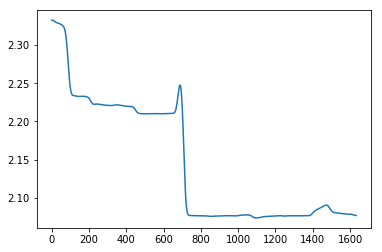

In [0]:
plt.plot(train_flux_proc[10])
plt.show()

In [0]:
#train = pd.read_csv('exoTrain.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1518) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#test = pd.read_csv('exoTest.csv')

In [0]:
#train.loc[:,"FLUX.1518"] = train.loc[:,"FLUX.1518"].astype('float64')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train, val = train_test_split(reduced_train_flux_y,train_size=0.85)

In [94]:
val.head()

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,...,16140,16145,16150,16155,16160,16165,16170,16175,16180,16185,16190,16195,16200,16205,16210,16215,16220,16225,16230,16235,16240,16245,16250,16255,16260,16265,16270,16275,16280,16285,16290,16295,16300,16305,16310,16315,16320,16325,tid,tfopwg_disp
16,1170.517822,1175.231445,1176.416016,1172.062744,1161.842041,1176.388672,1175.375488,1179.303223,1169.204834,1169.425415,1166.670166,1162.051392,1171.514526,1173.081543,1171.664551,1172.894897,1175.064087,1180.984863,1183.442261,1171.125000,1172.904419,1175.391968,1179.087646,1176.795898,1171.614258,1170.415039,1172.720337,1174.676270,1177.682983,1169.676147,1182.502930,1183.582275,1165.333618,1178.950684,1182.738403,1180.288330,1171.839966,1172.835815,1175.252930,1174.666504,...,1188.680420,1186.254028,1192.119019,1177.671753,1196.475098,1204.442871,1180.730591,1196.935913,1198.530640,1193.124146,1197.087524,1187.664551,1202.466797,1182.971558,1187.180908,1190.463501,1182.467163,1183.954956,1182.899170,1179.834961,1193.449829,1199.198608,1194.175537,1195.902954,1192.707275,1181.424316,1192.842285,1187.516724,1196.020142,1192.357300,1193.233521,1198.992554,1193.474731,1196.184814,1188.384888,1197.129761,1189.907227,1194.523804,280830734,0
209,1793.296509,1803.944092,1834.799316,1812.973999,1792.042603,1826.601196,1835.571289,1811.710449,1807.503540,1805.056152,1807.368286,1821.120972,1823.329346,1822.358398,1814.680542,1835.740479,1812.856567,1803.465820,1821.835449,1813.668945,1840.955078,1821.494507,1798.147949,1823.424194,1822.172607,1816.019165,1825.436768,1822.121582,1808.547363,1817.401001,1817.787354,1819.000977,1815.017456,1820.869019,1830.503540,1809.928955,1826.733276,1822.475708,1827.288452,1804.435059,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120610833,1
284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48103627,1
299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229047362,1
150,5868.061523,5880.271973,5839.654785,5860.352539,5855.241699,5866.193848,5855.633301,5845.066406,5881.437988,5883.504883,5867.297852,5847.258789,5844.946289,5861.228027,5840.636719,5861.829590,5861.906738,5854.358887,5861.575195,5859.634766,5854.256348,5846.650879,5879.488770,5864.154297,5858.955078,5873.341797,5875.925293,5863.832520,5853.242188,5865.979004,5844.1665

In [95]:
val['tfopwg_disp'].value_counts()

1    28
0    21
Name: tfopwg_disp, dtype: int64

In [96]:
train['tfopwg_disp'].value_counts()

0    146
1    131
Name: tfopwg_disp, dtype: int64

In [0]:
df_dev_y.reset_index().drop(['index'],axis=1)

,tfopwg_disp
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0
5,0.0
6,1.0
7,0.0
8,1.0
9,1.0


In [0]:
df_dev_x.shape

(25, 3267)

In [0]:
pd.DataFrame(df_dev_x).join(df_dev_y.reset_index().drop(['index'],axis=1))

In [0]:
def np_X_Y_from_df(df):
      df = shuffle(df)
      df_X = df.drop(['tfopwg_disp'], axis=1)
      X = np.array(df_X)
      Y_raw = np.array(df['tfopwg_disp']).reshape((len(df['tfopwg_disp']),1))
      Y = Y_raw == 1
      return X, Y

In [0]:
X_dev, Y_dev = np_X_Y_from_df(df_dev_processed)

In [110]:
    
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras import metrics
from keras.callbacks import ModelCheckpoint

from imblearn.over_sampling import SMOTE

from pathlib import Path

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import math
import time

from sklearn.metrics import classification_report

from  scipy import ndimage, fft
from sklearn.preprocessing import normalize

#from preprocess_data import LightFluxProcessor

np.random.seed(42)

LOAD_MODEL = True # continue training previous weights or start fresh
RENDER_PLOT = False # render loss and accuracy plots

def build_network():
      # Model config
      learning_rate = 0.001

      layers = [
          { "units": 1000, "input_dim": n_x, "activation": 'relu', "dropout": 0 },
          { "units": n_y, "input_dim": 1, "activation": 'sigmoid', "dropout": 0 },
      ]

      # Build model
      model = Sequential()
      model.add(Dense(1000, input_dim=n_x, activation='relu'))
      #model.add(Dense(500, activation='relu'))
      model.add(Dense(10, activation='relu'))
      model.add(Dense(1, activation='sigmoid'))

      model.compile(loss=keras.losses.binary_crossentropy,
                    optimizer=keras.optimizers.Adam(lr=learning_rate),
                    metrics=['accuracy'])
      return model

def np_X_Y_from_df(df):
      df = shuffle(df)
      df_X = df.drop(['tfopwg_disp'], axis=1)
      X = np.array(df_X)
      Y_raw = np.array(df['tfopwg_disp']).reshape((len(df['tfopwg_disp']),1))
      Y = Y_raw == 1
      return X, Y
    
if __name__ == "__main__":

      print("Loading datasets...")
      df_train = train
      df_dev = val

      # Generate X and Y dataframe sets
      df_train_x = df_train.drop(['tid','tfopwg_disp'], axis=1)
      df_dev_x = df_dev.drop(['tid','tfopwg_disp'], axis=1)
      df_train_y = df_train.tfopwg_disp
      df_dev_y = df_dev.tfopwg_disp

      # Process dataset
      LFP = LightFluxProcessor(
          fourier=False,
          normalize=True,
          gaussian=True,
          standardize=True)
      df_train_x, df_dev_x = LFP.process(df_train_x, df_dev_x)

      # Rejoin X and Y
      df_train_processed = pd.DataFrame(df_train_x).join(pd.DataFrame(df_train_y))
      df_dev_processed = pd.DataFrame(df_dev_x).join(pd.DataFrame(df_dev_y.reset_index().drop(['index'],axis=1)))

      # Load X and Y numpy arrays
      X_train, Y_train = np_X_Y_from_df(df_train_processed)
      X_dev, Y_dev = np_X_Y_from_df(df_dev_processed)

      # Print data set stats
      (num_examples, n_x) = X_train.shape # (n_x: input size, m : number of examples in the train set)
      n_y = Y_train.shape[1] # n_y : output size
      print("X_train.shape: ", X_train.shape)
      print("Y_train.shape: ", Y_train.shape)
      print("X_dev.shape: ", X_dev.shape)
      print("Y_dev.shape: ", Y_dev.shape)
      print("n_x: ", n_x)
      print("num_examples: ", num_examples)
      print("n_y: ", n_y)

      # Build model
      model = build_network()

      # Load weights
      load_path=""
      my_file = Path(load_path)
      if LOAD_MODEL and my_file.is_file():
          model.load_weights(load_path)
          print("------------")
          print("Loaded saved weights")
          print("------------")


      #sm = SMOTE(ratio = 1.0)
     # X_train_sm, Y_train_sm = sm.fit_sample(X_train, Y_train)
      # X_train_sm, Y_train_sm = X_train, Y_train


      # Train
      # checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
      # callbacks_list = [checkpoint]
      print("Training...")
      history = model.fit(X_train, Y_train, epochs=20, batch_size=16)

      # Metrics
      train_outputs = model.predict(X_train)
      dev_outputs = model.predict(X_dev)
      train_outputs = np.rint(train_outputs)
      dev_outputs = np.rint(dev_outputs)
      accuracy_train = accuracy_score(Y_train, train_outputs)
      accuracy_dev = accuracy_score(Y_dev, dev_outputs)
      precision_train = precision_score(Y_train, train_outputs)
      precision_dev = precision_score(Y_dev, dev_outputs)
      recall_train = recall_score(Y_train, train_outputs)
      recall_dev = recall_score(Y_dev, dev_outputs)
      confusion_matrix_train = confusion_matrix(Y_train, train_outputs)
      confusion_matrix_dev = confusion_matrix(Y_dev, dev_outputs)


Loading datasets...
Normalizing...
Applying Gaussian Filter...
Standardizing...
Finished Processing!
X_train.shape:  (277, 3266)
Y_train.shape:  (277, 1)
X_dev.shape:  (49, 3266)
Y_dev.shape:  (49, 1)
n_x:  3266
num_examples:  277
n_y:  1
Training...
Epoch 1/20
277/277 [==============================] - 1s 3ms/step - loss: 0.8308 - acc: 0.6787
Epoch 2/20
277/277 [==============================] - 0s 639us/step - loss: 0.7650 - acc: 0.6751
Epoch 3/20
277/277 [==============================] - 0s 619us/step - loss: 0.5964 - acc: 0.7401
Epoch 4/20
277/277 [==============================] - 0s 651us/step - loss: 0.3948 - acc: 0.8195
Epoch 5/20
277/277 [==============================] - 0s 635us/step - loss: 0.3284 - acc: 0.8953
Epoch 6/20
277/277 [==============================] - 0s 610us/step - loss: 0.2871 - acc: 0.9278
Epoch 7/20
277/277 [==============================] - 0s 596us/step - loss: 0.2875 - acc: 0.9242
Epoch 8/20
277/277 [==============================] - 0s 594us/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [103]:
Y_train

array([[False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [

In [105]:
dev_outputs

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [0]:
print("train set error", 1.0 - accuracy_train)
print("dev set error", 1.0 - accuracy_dev)
print("------------")
print("precision_train", precision_train)
print("precision_dev", precision_dev)
print("------------")
print("recall_train", recall_train)
print("recall_dev", recall_dev)
print("------------")
print("confusion_matrix_train")
print(confusion_matrix_train)
print("confusion_matrix_dev")
print(confusion_matrix_dev)
print("------------")
print("Train Set Positive Predictions", np.count_nonzero(train_outputs))
print("Dev Set Positive Predictions", np.count_nonzero(dev_outputs))
#  Predicting 0's will give you error:
print("------------")
print("All 0's error train set", 37/5087)
print("All 0's error dev set", 5/570)

print("------------")
print("------------")

if RENDER_PLOT:
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    # plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    # plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

train set error 0.1004784688995215
dev set error 0.43243243243243246
------------
precision_train 0.79
precision_dev 0.5862068965517241
------------
recall_train 1.0
recall_dev 0.8095238095238095
------------
confusion_matrix_train
[[109  21]
 [  0  79]]
confusion_matrix_dev
[[ 4 12]
 [ 4 17]]
------------
Train Set Positive Predictions 100
Dev Set Positive Predictions 29
------------
All 0's error train set 0.007273442107332416
All 0's error dev set 0.008771929824561403
------------
------------


In [0]:
print("train set error", 1.0 - accuracy_train)
print("dev set error", 1.0 - accuracy_dev)
print("------------")
print("precision_train", precision_train)
print("precision_dev", precision_dev)
print("------------")
print("recall_train", recall_train)
print("recall_dev", recall_dev)
print("------------")
print("confusion_matrix_train")
print(confusion_matrix_train)
print("confusion_matrix_dev")
print(confusion_matrix_dev)
print("------------")
print("Train Set Positive Predictions", np.count_nonzero(train_outputs))
print("Dev Set Positive Predictions", np.count_nonzero(dev_outputs))
#  Predicting 0's will give you error:
print("------------")
print("All 0's error train set", 37/5087)
print("All 0's error dev set", 5/570)

print("------------")
print("------------")

if RENDER_PLOT:
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    # plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    # plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

train set error 0.11224489795918369
dev set error 0.45999999999999996
------------
precision_train 0.8028169014084507
precision_dev 0.7142857142857143
------------
recall_train 0.8769230769230769
recall_dev 0.19230769230769232
------------
confusion_matrix_train
[[117  14]
 [  8  57]]
confusion_matrix_dev
[[22  2]
 [21  5]]
------------
Train Set Positive Predictions 71
Dev Set Positive Predictions 7
------------
All 0's error train set 0.007273442107332416
All 0's error dev set 0.008771929824561403
------------
------------


In [0]:
# Save model
print("Saving model...")
save_weights_path = "model4".format(recall_train, recall_dev) # load_path
model.save_weights(save_weights_path)
save_path = "models_v2/model-recall-{}-{}.hdf5".format(recall_train, recall_dev) # load_path
# model.save(save_path)



Saving model...


In [0]:
test_flux, df_dev_x = LFP.process(test_flux, test_flux)

NameError: ignored

In [0]:
predictions = pd.DataFrame(model.predict(test_flux, batch_size=32), columns=['predictions'])
ids = pd.DataFrame(list(tess_id['ticid'].head(58)), columns=['TCID'])
predictions = pd.concat([list(tess_id['ticid'].head(58)), predictions])

In [0]:
predictions.head()

In [0]:
predictions.to_csv(r'\Tess predictions.csv')